In [196]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Prologue: an atomistic view of electrical resistance

# 1.3 The Quantum of Conductance 

In [261]:
def DOS(E,gam,ep):
    return (gam/(2*np.pi))/((E-ep)**2 + (gam/2)**2)

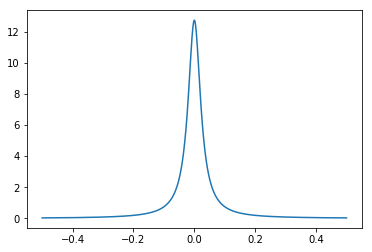

In [268]:
E = np.linspace(-0.5,0.5,50001)
dE = E[1]-E[0]
D = DOS(E,0.05,0)
plt.plot(E,D)

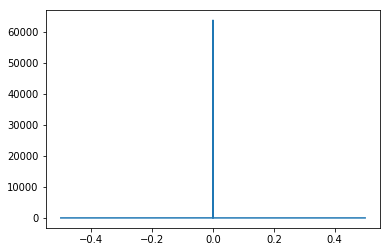

In [266]:
E = np.linspace(-0.5,0.5,5001)
D = DOS(E,0.00001,0)
plt.plot(E,D)

# 1.4 Potential Profile

In [197]:
def potential(Vg,Vd,U0,delN,a,b):
    q = 1
    UL =(a)*(-q*Vg)+(b)*(-q*Vd)
    U = UL + U0*(delN)
    return U 

def fermi_dirac(E,mu,kbT):
    return 1/(1+np.exp((E-mu)/kbT))

def DOS(E,gam,ep):
    dE = E[1]-E[0]
    D = (gam/(2*np.pi))/((E-ep)**2 + (gam/2)**2)
    return D/(dE*(np.sum(D))) # normalizing to one


In [208]:
def number_of_electrons(U,gam1,gam2,mu1,mu2,kbT,ep):
    E = np.linspace(-1,1,501)
    dE = E[1]-E[0]
    gam = gam1 + gam2
    d = DOS(E-U,gam,ep)
    f1 = fermi_dirac(E,mu1,kbT)
    f2 = fermi_dirac(E,mu2,kbT)
    c = (gam1*f1 + gam2*f2)/(gam)
    N = np.sum(dE*d*c)
    return N

def current(U,gam1,gam2,mu1,mu2,kbT,ep):
    E = np.linspace(-1,1,501)
    dE = E[1]-E[0]
    d = DOS(E-U,gam1+gam2,ep)
    f1 = fermi_dirac(E,mu1,kbT)
    f2 = fermi_dirac(E,mu2,kbT)
    c = (gam1*gam2)/(gam1+gam2)
    q = 1.602e-19
    hbar = 1.055e-34    
    I = (q*q/hbar)*np.sum(dE*d*c*(f1-f2))
    return I

In [216]:
# physical parameter
U0 = 0.025
Vg = 0 
a = 1
b = 0.5
gam1 = gam2 = 0.005
mu1=0
mu2=mu1-Vd
ep = 0.2
kbT = 0.025

# arbitrary parameter 
Ui = 1 # initial guess for U
alpha = 0.99
V = np.linspace(0,1,100)
ele = []
curr = []

for i in range(0,len(V)):
    # bias
    Vd = V[i]
    mu1=0
    mu2=mu1-Vd
    N0 = 1 #number_of_electrons(ep,gam1,gam2,mu1,mu2,kbT,ep)
    
    # the self-consistency test
    while True:
        N = number_of_electrons(Ui,gam1,gam2,mu1,mu2,kbT,ep)
        delN = N-N0
        U_new = potential(Vg,Vd,U0,delN,a,b)
        if abs(U_new-Ui) < 0.00001:
            break
        Ui = Ui + alpha*(U_new-Ui)
    I = current(Ui,gam1,gam2,mu1,mu2,kbT,ep)
    ele.append(N)
    curr.append(I)

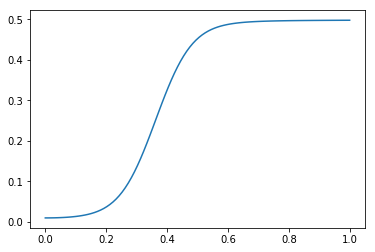

In [217]:
plt.plot(V,ele)

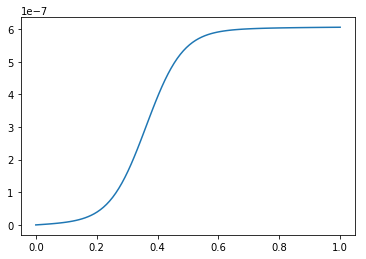

In [219]:
plt.plot(V,curr)

# 1.5 Coulomb Blockade

In [231]:
E = np.linspace(-5,5,501)
D = 2*DOS(E,0.05,0)

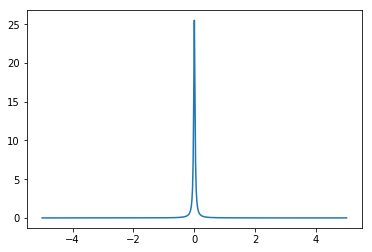

In [237]:
plt.plot(E,D)

In [270]:
U0 = 0.25
D = DOS(E-U0,0.05,0)
D2 = D + DOS(E+U0,0.05,0)

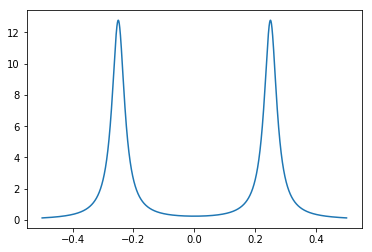

In [271]:
plt.plot(E,D2)

## E.1.3

In [284]:
def current(U,gam1,gam2,mu1,mu2,kbT1,kbT2,ep):
    E = np.linspace(-1,1,101)
    dE = E[1]-E[0]
    d = DOS(E-U,gam1+gam2,ep)
    f1 = fermi_dirac(E,mu1,kbT1)
    f2 = fermi_dirac(E,mu2,kbT2)
    c = (gam1*gam2)/(gam1+gam2)
    q = 1.602e-19
    hbar = 1.055e-34    
    I = 2*(q*q/hbar)*np.sum(dE*d*c*(f1-f2))
    return I

V = np.linspace(-0.25,0.25,101)
test  = []
for i in range(0,len(V)):
    mu1 = ep+V[i]
    I = current(0,0.05,0.05,mu1,mu1,0.026,0.025,0.2)
    test.append(I)

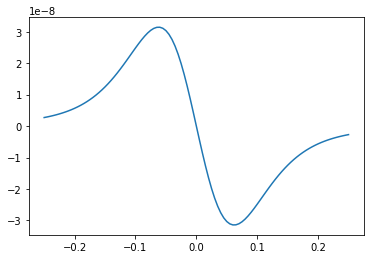

In [285]:
plt.plot(V,test)

# 2. Schrodinger Equation

In [21]:
import scipy.sparse as spsp
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import eigh,eig

### Particle in a Box
Goal: understand how to find the eigenergies and eigenvectors numerically using the method of finite differences 
    

In [412]:
# Hamiltonian
# physical parameters 
'''
a = lattice spacing 
t0 is divided by q to convert to eV units
N = number of lattice points
'''

a = 1e-10
hbar = 1.0545718e-34
m = 9.10938356e-31
t0 = (hbar**2/(2*m*a**2))/(1.6021766208e-19)  

N = 100 
H = np.diagflat([[-t0]*(N-1)],-1) + np.diagflat([[2*t0]*(N)],0) + np.diagflat([[-t0]*(N-1)],1)

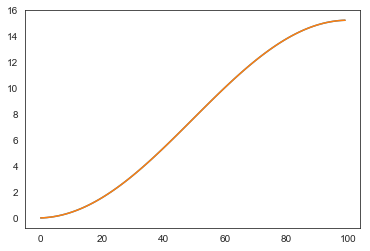

In [413]:
# for eig you have to sort the eigenvalues
eigenval, eigenvec = eig(H1)
eigenval.sort()
plt.plot(vals)

# for eigh you don't have to sort the eigenvalues 
eigenval2, eigenvec= eigh(H1)
plt.plot(eigenval2)

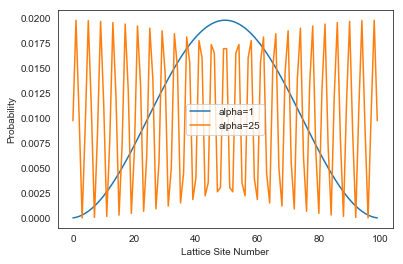

In [433]:
plt.xlabel("Lattice Site Number")
plt.ylabel("Probability")
psi = eigenvec[:,0]
P = psi*np.conj(psi)
plt.plot(P,label="alpha=1")

psi25 = eigenvec[:,24] 
P25 = psi25*np.conj(psi25)
plt.plot(P25,label="alpha=25")
plt.legend()

In [426]:
x = np.linspace(0,1,N)*a
L = 101*a
energy_list = [((hbar*i*np.pi)**2/(2*m*L**2))/(1.6021766208e-19) for i in range(1,101)]

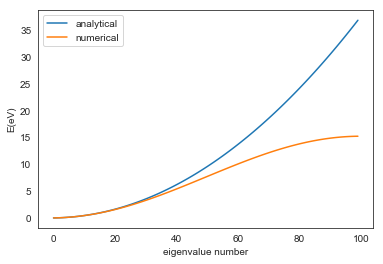

In [427]:
plt.xlabel("eigenvalue number")
plt.ylabel("E(eV)")
plt.plot(Elist,label="analytical")
plt.plot(vals2,label="numerical")
plt.legend()

## Particle in a 3D "box"

In [374]:
N = 100
f = np.zeros(N) # container
a = (5e-10)/N
r = np.arange(1,N+1)*a
# quantum numbers 
n = 1 ; l=0 # 1s
#n = 2 ; l=0 # 2s
#n = 2 ; l=1 # 2p 

#Physical parameters
hbar = 1.0545718e-34
m = 9.10938356e-31
q = (1.6021766208e-19)
ep = 8.85e-12
t0 = (hbar**2/(2*m*a**2))/q
v0 = -(q)/(4*np.pi*ep*r) + l*(l+1)*(hbar**2)/(2*m*q*(r**2))

# Hamiltonian 
H = np.diagflat([-t0]*(N-1),-1) + np.diagflat([2*t0]*N,0) + np.diagflat([-t0]*(N-1),1)
V = np.diagflat([v0])

values,vectors= eigh(H+V) #get the sorted eigenvalues

# For 1s 
psi=vectors[:,0] # get the first eigenvector for the lowest eigenvalue
P1= psi*np.conj(psi)   # calculating the probability 

psi1=vectors[:,1] # get the first eigenvector for the lowest eigenvalue
P2= psi1*np.conj(psi1)   # calculating the probability 

psi2=vectors[:,2] # get the first eigenvector for the lowest eigenvalue
P3= psi2*np.conj(psi2)   # calculating the probability 

E = values[:2]
print(f'2 lowest eigenvalues: {E[0]:.2f} eV and {E[1]:.2f} eV')

2 lowest eigenvalues: -13.59 eV and -2.97 eV


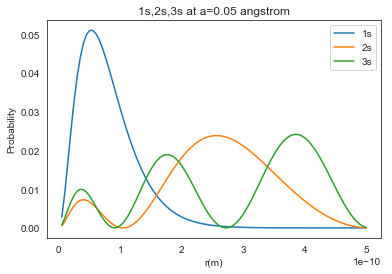

In [375]:
import seaborn as sns
sns.set_style("white")
plt.title("1s,2s,3s at a=0.05 angstrom")
plt.xlabel("r(m)")
plt.ylabel("Probability")
plt.plot(r,P1,label="1s")
plt.plot(r,P2,label="2s")
plt.plot(r,P3,label="3s")
plt.legend()

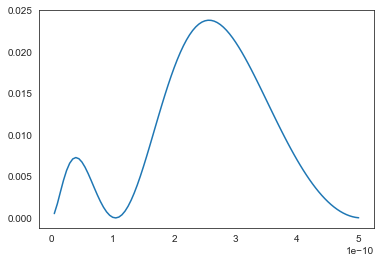

In [376]:
plt.plot(r,P2,label="2s")

0.9597187775817956


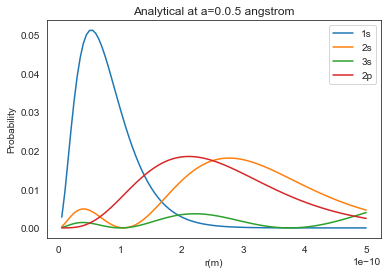

In [377]:
import seaborn as sns
sns.set_style("white")
plt.xlabel("r(m)")
plt.ylabel("Probability")
plt.title("Analytical at a=0.0.5 angstrom")
# Analytical Solutions
P1s = (4*a/a0**3)*((r)**2)*np.exp(-2*r/a0)
plt.plot(r,P1s,label="1s")

P2s = ((4*a)/(2*4*4*(a0**3)))*((r)**2)*((2-(r/a0))**2)*np.exp(-2*r/(2*a0))
plt.plot(r,P2s,label="2s")

P3s = ((4*a)/(3*81*81*(a0**3)))*((r)**2)*(((27-(18*r/a0)) + ((2*(r/a0)**2)))**2)*np.exp(-2*r/(3*a0))
plt.plot(r,P3s,label="3s") 

P2p = ((4*a)/(3*32*(a0**3)))*((r)**2)*((r/a0)**2)*np.exp(-2*r/(2*a0))
plt.plot(r,P2p,label="2p")


plt.legend()
print(sum(P2p))

#### Analytical vs Numerical Calculation of 1s 

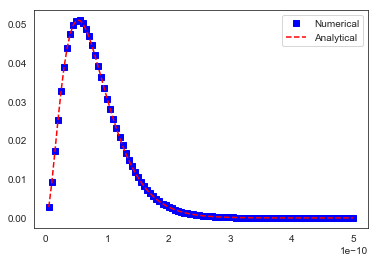

In [378]:
label="Analytical"
plt.plot(r,P1,'bs',label="Numerical")
plt.plot(r,P1s,'r--',label="Analytical")
plt.legend()

#### Analytical vs Numerical Calculation of 2s 

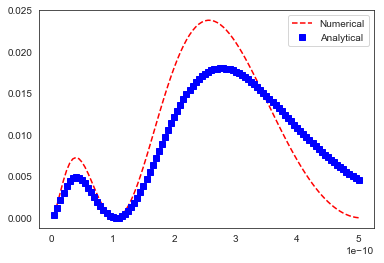

In [381]:
label="Analytical"
plt.plot(r,P2,'r--',label="Numerical")
plt.plot(r,P2s,'bs',label="Analytical")
plt.legend()

#### Analytical vs Numerical Calculation of 3s 

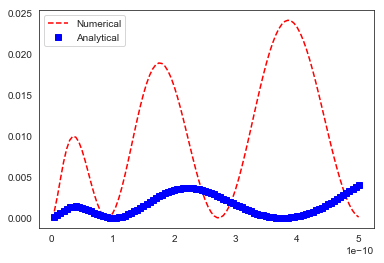

In [382]:
label="Analytical"
plt.plot(r,P3,'r--',label="Numerical")
plt.plot(r,P3s,'bs',label="Analytical")
plt.legend()

## When N=200

The previous result on 2s is degraded because the wavefunction is not sampled enough. We could improve the agreement for both 1s and 2s levels by using 200 points ($N=200$) spaced by a=0.05 angstrom, so that we would have both  fine sampling and large range.

In [406]:
# Figure 2.3.7: 
N = 200
a = (5e-10)*2/N
r = np.arange(1,N+1)*a
# quantum numbers 
n = 1 ; l=0 # 1s
#n = 2 ; l=0 # 2s
#n = 2 ; l=1 # 2p 

#Physical parameters
hbar = 1.0545718e-34
m = 9.10938356e-31
q = (1.6021766208e-19)
ep = 8.85e-12
t0 = (hbar**2/(2*m*a**2))/q
v0 = -(q)/(4*np.pi*ep*r) + l*(l+1)*(hbar**2)/(2*m*q*(r**2))

# Hamiltonian 
H = np.diagflat([-t0]*(N-1),-1) + np.diagflat([2*t0]*N,0) + np.diagflat([-t0]*(N-1),1)
V = np.diagflat([v0])

values,vectors= eigh(H+V) #get the sorted eigenvalues

# For 1s 
psi=vectors[:,0] # get the first eigenvector for the lowest eigenvalue
P1= psi*np.conj(psi)   # calculating the probability 

psi1=vectors[:,1] # get the first eigenvector for the lowest eigenvalue
P2= psi1*np.conj(psi1)   # calculating the probability 

psi2=vectors[:,2] # get the first eigenvector for the lowest eigenvalue
P3= psi2*np.conj(psi2)   # calculating the probability 

E = values[:2]
print(f'2 lowest eigenvalues: {E[0]:.2f} eV and {E[1]:.2f} eV')

2 lowest eigenvalues: -13.59 eV and -3.40 eV


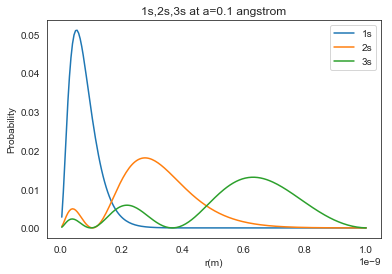

In [402]:
import seaborn as sns
sns.set_style("white")
plt.title("1s,2s,3s at a=0.1 angstrom")
plt.xlabel("r(m)")
plt.ylabel("Probability")

plt.plot(r,P1,label="1s")
plt.plot(r,P2,label="2s")
plt.plot(r,P3,label="3s")
plt.legend()

0.9999605330219665


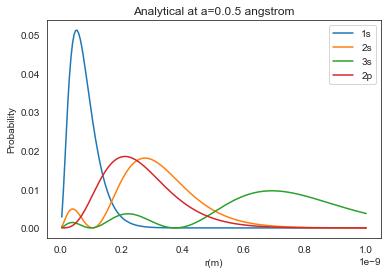

In [403]:
import seaborn as sns
sns.set_style("white")
plt.xlabel("r(m)")
plt.ylabel("Probability")
plt.title("Analytical at a=0.0.5 angstrom")
# Analytical Solutions
P1s = (4*a/a0**3)*((r)**2)*np.exp(-2*r/a0)
plt.plot(r,P1s,label="1s")

P2s = ((4*a)/(2*4*4*(a0**3)))*((r)**2)*((2-(r/a0))**2)*np.exp(-2*r/(2*a0))
plt.plot(r,P2s,label="2s")

P3s = ((4*a)/(3*81*81*(a0**3)))*((r)**2)*(((27-(18*r/a0)) + ((2*(r/a0)**2)))**2)*np.exp(-2*r/(3*a0))
plt.plot(r,P3s,label="3s") 

P2p = ((4*a)/(3*32*(a0**3)))*((r)**2)*((r/a0)**2)*np.exp(-2*r/(2*a0))
plt.plot(r,P2p,label="2p")


plt.legend()
print(sum(P2p))

#### Analytical vs Numerical Calculation of 2s 

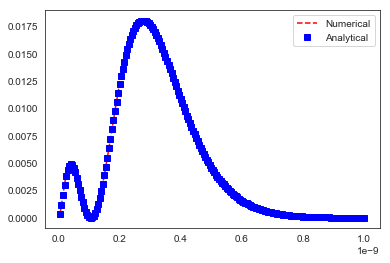

In [404]:
label="Analytical"
plt.plot(r,P2,'r--',label="Numerical")
plt.plot(r,P2s,'bs',label="Analytical")
plt.legend()

#### Analytical vs Numerical Calculation of 3s 
How do we improve the 3s state? 
- the size of the lattice has to be big enough to cover the entire range of wavefunction

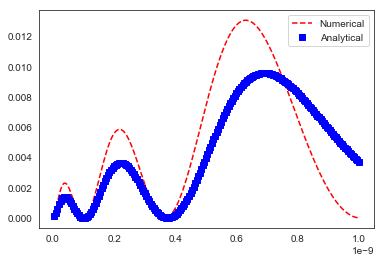

In [405]:
label="Analytical"
plt.plot(r,P3,'r--',label="Numerical")
plt.plot(r,P3s,'bs',label="Analytical")
plt.legend()

# 3. Self-consistent field

- as we move to multi-eletron atoms, we are faced with the issue of electron-electron interactions, which is at the heart of almost all the unsolved problems in our field. 

Goal: 
- explain the `self-consistent field (SCF)` procedure, which provides an approximate way to include electron-electron interactions into the Schrodinger equation
- the interpretation of the energy levels obtained from this so-called "one-electron" Schrodinger equations
- the energetic considerations underlying the process by which atoms "bond" to form molecules

In [478]:
def hamiltonian(U,N,L):
    #Physical parameters
    hbar = 1.0545718e-34
    m = 9.10938356e-31
    q = (1.6021766208e-19)
    ep = 8.85e-12
    a = (L)*2/N
    r = np.arange(1,N+1)*a
    
    t0 = (hbar**2/(2*m*a**2))/q
    a = (L)*2/N
    v0 = -(q)/(4*np.pi*ep*r) + l*(l+1)*(hbar**2)/(2*m*q*(r**2)) + U

    # Hamiltonian 
    H = np.diagflat([-t0]*(N-1),-1) + np.diagflat([2*t0]*N,0) + np.diagflat([-t0]*(N-1),1)
    V = np.diagflat([v0])
    return H+V

In [494]:
Z=2
Uscf = 0
H = hamiltonian(Uscf,100,5e-10)
val,vect = eig(H)

In [495]:
#y00 = np.sqrt(1/(4*np.pi))
#y10 = np.sqrt()
#n = (f1*np.conj(f1)/(r[0]**2))*(y00)**2 + (f2*np.conj(f2)/(r[1]**2))*(y10)**2

In [496]:
f1 = vect[0]
f2 = vect[1]

sigma = (f1*np.conj(f1))**2 + (f2*np.conj(f2))**2
a = 
Uscf = (Z-1)/Z*(q/(4*np.pi*ep*r))*(a+b)

In [499]:
a = (5e-10)*2/N
r = np.arange(1,N+1)*a
